# Домашнее задание к лекции "Статистика. Практика"

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 13,6
import matplotlib.pyplot as plt
from scipy import stats as st

## Задание 1

Вернемся к [набору данных о видеоиграх](https://github.com/obulygin/pyda_homeworks/blob/master/stat_case_study/video_games_sales.csv).

Ответьте на следующие вопросы:

1) Как критики относятся к спортивным играм?  
2) Критикам нравятся больше игры на PC или на PS4?  
3) Критикам больше нравятся стрелялки или стратегии?  

Для каждого вопроса:
- сформулируйте нулевую и альтернативную гипотезы;
- выберите пороговый уровень статистической значимости;
- опишите полученные результаты статистического теста.

In [2]:
df_games = pd.read_csv('video_games_sales.csv')
df_games

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55787,55788,Indivisible,indivisible,Role-Playing,NaN,PC,505 Games,Lab Zero Games,NaN,NaN,...,NaN,NaN,NaN,NaN,2019.0,11th Apr 19,http://www.vgchartz.com/game/224682/indivisibl...,1,NaN,/games/boxart/full_6339426AmericaFrontccc.jpg
55788,55789,Lost Ember,lost-amber,Adventure,RP,PC,Mooneye Studios,Mooneye Studios,NaN,NaN,...,NaN,NaN,NaN,NaN,2019.0,11th Apr 19,http://www.vgchartz.com/games/game.php?id=2246...,1,NaN,/games/boxart/full_8893129AmericaFrontccc.jpg
55789,55790,Lost Ember,lost-amber,Adventure,RP,PS4,Mooneye Studios,Mooneye Studios,NaN,NaN,...,NaN,NaN,NaN,NaN,2019.0,11th Apr 19,http://www.vgchartz.com/game/224690/lost-ember...,1,NaN,/games/boxart/full_6514293AmericaFrontccc.jpg
55790,55791,Lost Ember,lost-amber,Adventure,RP,XOne,Mooneye Studios,Mooneye Studios,NaN,NaN,...,NaN,NaN,NaN,NaN,2019.0,11th Apr 19,http://www.vgchartz.com/game/224688/lost-ember...,1,NaN,/games/boxart/full_6799693AmericaFrontccc.jpg


In [3]:
pd.DataFrame(df_games.Genre.value_counts())

,Genre
Misc,9476
Action,7667
Adventure,5293
Sports,5244
Shooter,4586
Role-Playing,4551
Platform,3445
Strategy,3266
Puzzle,3162
Racing,3030


7.291424418604655

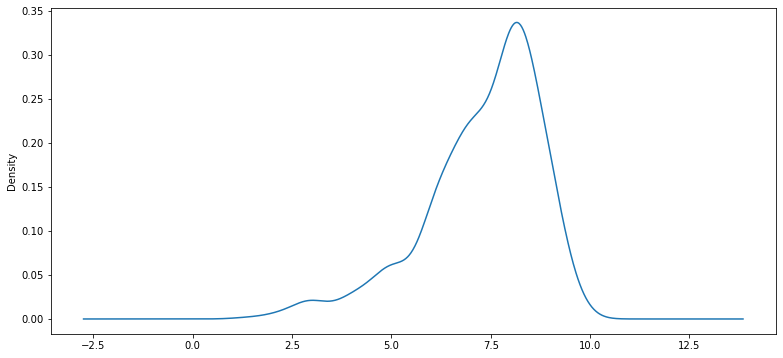

In [4]:
df_games[df_games['Genre']=='Sports']['Critic_Score'].plot(kind='density')
df_games[df_games['Genre']=='Sports']['Critic_Score'].mean()

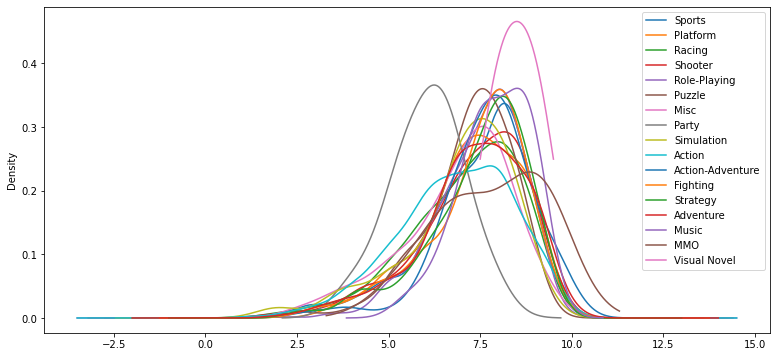

In [5]:
df_genre = pd.DataFrame()
for genre in df_games.Genre.unique():
    df_genre = df_genre.merge(pd.DataFrame( {genre : list(df_games[df_games['Genre']==genre]['Critic_Score'].dropna())} ),
                              how='outer',
                              left_index=True,
                              right_index=True)
df_genre = df_genre.drop(columns=['Sandbox','Education', 'Board Game'])
df_genre.plot(kind='density')

In [6]:
df_games.groupby('Genre')['Critic_Score'].mean().sort_values(ascending = False)

Genre
Sandbox             9.200000
Visual Novel        8.500000
Music               7.912000
MMO                 7.810000
Action-Adventure    7.693939
Education           7.500000
Role-Playing        7.461610
Strategy            7.429268
Fighting            7.388415
Adventure           7.329188
Platform            7.308333
Sports              7.291424
Shooter             7.286833
Puzzle              7.200000
Racing              7.091145
Simulation          6.926201
Misc                6.885799
Action              6.840234
Party               6.053333
Board Game          5.300000
Name: Critic_Score, dtype: float64

In [7]:
df_games['Critic_Score'].mean()

7.21370869033052

In [8]:
# H0 - критики к спортивным играм относятся лучше среднего ( > 7.214 )
# H1 - критики к спортивным играм относятся хуже среднего ( < 7.214 )

alpha = 0.05

result = st.ttest_1samp(df_games[df_games['Genre']=='Sports']['Critic_Score'].dropna(), 7.214)

print(result)

if (result.statistic < 0) & (result.pvalue / 2 < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую нулевую гипотезу')

Ttest_1sampResult(statistic=1.380758875402541, pvalue=0.1678021310717771)
Не отвергаем нулевую нулевую гипотезу


### Вывод:
Критики довольно хорошо относятся к спортивным играм: выше установленного нами порога (выше средней оценки по всем играм). Хотя чисто формально в таблице средних рейтингов, игры данного жанра находятся где-то в середине, и есть не мало жанров, к которым критики более благосклонны. В общем: не плохо, но есть куда расти.

In [9]:
df_games.groupby('Platform')['Critic_Score'].mean().dropna().sort_values(ascending = False)

Platform
GBC      9.100000
OSX      8.750000
Linux    8.700000
GEN      8.666667
NES      8.600000
SNES     8.433333
SAT      8.100000
PS4      7.904587
VC       7.887143
XOne     7.854386
iOS      7.800000
NS       7.652308
GB       7.644000
PC       7.541850
XB       7.458333
PS2      7.439370
PS3      7.396386
WiiU     7.352564
PSV      7.342857
N64      7.275490
SCD      7.260000
PSN      7.233983
PS       7.211236
X360     7.195367
XBL      7.156402
DS       7.130408
3DS      7.065315
DC       7.064634
GC       6.994242
WW       6.913095
PSP      6.868916
Wii      6.784726
GBA      6.585526
NGage    6.506667
DSiW     6.385366
AJ       4.000000
Name: Critic_Score, dtype: float64

In [10]:
# H0: средняя оценка критиков для PC и PS4 одинаковая
# H1: средняя оценка критиков для PC и PS4 различается

alpha = 0.05

result = st.ttest_ind(df_games[df_games['Platform']=='PS4']['Critic_Score'].dropna(),
                      df_games[df_games['Platform']=='PC']['Critic_Score'].dropna(),
                      equal_var=False)

print(result)

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

Ttest_indResult(statistic=2.7394476056351627, pvalue=0.006931808250254211)
Отвергаем нулевую гипотезу


### Вывод:
Критики к играм на PS4 относятся лучше, чем к играм на PC.

In [11]:
df_games.groupby('Genre')['Critic_Score'].mean().dropna().sort_values(ascending = False)

Genre
Sandbox             9.200000
Visual Novel        8.500000
Music               7.912000
MMO                 7.810000
Action-Adventure    7.693939
Education           7.500000
Role-Playing        7.461610
Strategy            7.429268
Fighting            7.388415
Adventure           7.329188
Platform            7.308333
Sports              7.291424
Shooter             7.286833
Puzzle              7.200000
Racing              7.091145
Simulation          6.926201
Misc                6.885799
Action              6.840234
Party               6.053333
Board Game          5.300000
Name: Critic_Score, dtype: float64

In [12]:
# H0: средняя оценка критиков для Shooter и Strategy одинаковая
# H1: средняя оценка критиков для Shooter и Strategy различается

alpha = 0.05

result = st.ttest_ind(df_games[df_games['Genre']=='Shooter']['Critic_Score'].dropna(),
                      df_games[df_games['Genre']=='Strategy']['Critic_Score'].dropna(),
                      equal_var=False)

print(result)

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

Ttest_indResult(statistic=-1.6073949711166526, pvalue=0.10838786414223071)
Не отвергаем нулевую гипотезу


### Вывод:
Можно считать, что критики к шутерам и стратегиям относятся примерно одинаково.
_________

## Задание 2

Реализуйте базовую модель логистической регрессии для классификации текстовых сообщений (используемые данные [здесь](https://github.com/obulygin/pyda_homeworks/blob/master/stat_case_study/spam.csv)) по признаку спама. Для этого:

1) Привидите весь текст к нижнему регистру;  
2) Удалите мусорные символы;  
3) Удалите стоп-слова;  
4) Привидите все слова к нормальной форме;  
5) Преобразуйте все сообщения в вектора TF-IDF. Вам поможет следующий код:  

```
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df.Message)
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=cname)
```

Можете поэкспериментировать с параметрами [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html);  
6) Разделите данные на тестовые и тренировочные в соотношении 30/70, укажите `random_state=42`. Используйте [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html);  
7) Постройте модель [логистической регрессии](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), укажите `random_state=42`, оцените ее точность на тестовых данных;  
8) Опишите результаты при помощи [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion_matrix#sklearn.metrics.confusion_matrix);  
9) Постройте датафрейм, который будет содержать все исходные тексты сообщений, классифицированные неправильно (с указанием фактического и предсказанного).

In [62]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [19]:
df_spam = pd.read_csv('spam.csv')
df_spam

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [28]:
def del_stop_words(str_):
    stopwords_set = set(stopwords.words('english'))
    str_ = str_.split(' ')
    return ' '.join([word for word in str_ if word not in stopwords_set])

def lemmatize(str_):
    wordnet_lemmatizer = WordNetLemmatizer()
    str_ = str_.split(' ')
    return ' '.join([WordNetLemmatizer().lemmatize(word) for word in str_])

In [52]:
df_spam = pd.read_csv('spam.csv')
df_spam.Message = df_spam.Message.apply(lambda x: x.lower())
df_spam.Message = df_spam.Message.apply(lambda x: re.sub('[\W_]+',' ', x))
df_spam.Message = df_spam.Message.apply(del_stop_words)
df_spam.Message = df_spam.Message.apply(lemmatize)
df_spam

,Category,Message
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah think go usf life around though
...,...,...
5567,spam,2nd time tried 2 contact u u 750 pound prize 2...
5568,ham,ü b going esplanade fr home
5569,ham,pity mood suggestion
5570,ham,guy bitching acted like interested buying some...


In [53]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df_spam.Message)
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)

In [54]:
tfidf_matrix

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df_spam.Category, test_size=0.30, random_state=42)

Надеюсь я правильно понял, что мы по матрице векторов предсказываем категорию сообщения? Из задания просто не очень понятен этот момент) Я попробовал предсказать по матрице содержание сообщения, и там accuracy_score получился 0.0455 :) Но занимательный факт, что совпадения всё-таки видимо есть!!!

In [65]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [66]:
y_predict = lda.predict(X_test)

In [67]:
accuracy_score(y_test, y_predict)

0.9677033492822966

In [68]:
confusion_matrix(y_test, y_predict)

array([[1445,    3],
       [  51,  173]], dtype=int64)

In [130]:
x = pd.concat([pd.DataFrame({'y_test':y_test}).reset_index(), 
           pd.DataFrame({'y_predict' : y_predict})],
          axis=1)

print(1-len(x[x['y_test']!=x['y_predict']])/len(x)) # проверил, все ли несовпадения я собрал

df_result = x[x['y_test']!=x['y_predict']]
df_result.head()

0.9677033492822966


,index,y_test,y_predict
22,2422,ham,spam
40,881,spam,ham
47,1961,spam,ham
74,3864,spam,ham
84,2575,spam,ham


In [145]:
df_spam_true = pd.read_csv('spam.csv')
df_result['Message'] = [df_spam_true.Message.loc[index] for index in df_result['index']]
df_result

<ipython-input-145-fdf927bb24d9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result['Message'] = [df_spam_true.Message.loc[index] for index in df_result['index']]


,index,y_test,y_predict,Message
22,2422,ham,spam,Err... Cud do. I'm going to at 8pm. I haven't...
40,881,spam,ham,Reminder: You have not downloaded the content ...
47,1961,spam,ham,Guess what! Somebody you know secretly fancies...
74,3864,spam,ham,Oh my god! I've found your number again! I'm s...
84,2575,spam,ham,Your next amazing xxx PICSFREE1 video will be ...
160,2402,spam,ham,Babe: U want me dont u baby! Im nasty and have...
166,4527,spam,ham,"I want some cock! My hubby's away, I need a re..."
194,1924,ham,spam,Hello. They are going to the village pub at 8 ...
234,2663,spam,ham,Hello darling how are you today? I would love ...
260,1022,spam,ham,Guess what! Somebody you know secretly fancies...
